# Project T Final: PCA and CCA

By Jai Bansal, Abhinav Gopal, Grace Kull, William McEachen, Shrey Vasavada

In [258]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

Run the cell below only once per session. The utils.py file contains some black box functions which will be used later in this assignment. 

In [259]:
!ln -s ./utils.py utils.py

ln: failed to create symbolic link 'utils.py': File exists


In [295]:
import utils

## Part 1: Initial Data Cleaning

In this assignment, we will be looking at a real dataset of baseball players, using their game statistics to predict their salaries. Some of the information in this dataset about the players includes their names, ids, positions, years played, and their batting statistics. 

First, load the csv file to see all the information.

In [261]:
baseball = pd.read_csv("baseball_data.csv")

In [308]:
baseball.head()

,id,yearid,teamid,lgid,namefirst,namelast,salary,pos,g.x,gs,...,sh,sf,gidp,years,cab,ch,chr,cr,crbi,cbb
0,abreubo01,2012.0,LAA,AL,Bobby,Abreu,9000000.0,OF,54,50,...,0,1,7,17,8347,2437,287,1441,1349,1456
1,abreuto01,NaN,NaN,NaN,NaN,NaN,NaN,23,21,17,...,0,1,1,4,437,110,4,40,46,16
2,ackledu01,2012.0,SEA,AL,Dustin,Ackley,2100000.0,12,153,147,...,1,1,3,2,940,228,18,123,86,99
3,adamsma01,NaN,NaN,NaN,NaN,NaN,NaN,1B,24,23,...,0,0,3,1,86,21,2,8,13,5
4,allenbr01,2012.0,OAK,AL,Brandon,Allen,482500.0,O1,6,5,...,0,0,0,4,344,70,12,44,41,42


From the initial obsevation of the data, it is clear that the types of data needed to predict salaries will be numerical or categorical. Additionally, rows with no salary information will have no use to us. So we'll start the data cleaning process by dropping columns that don't have categorical or numerical data, and dropping rows with no salary information. The columns being dropped are 'id', 'teamid', 'yearid', 'lgid','namefirst','namelast', and 'g_batting'.

In [263]:
data = baseball.drop(columns = ['id', 'teamid', 'yearid','lgid','namefirst','namelast', 'g_batting'])
data = data[data['salary'] > 0]

We will now start one-hot encoding our position data. Because there are several different positions, where each one can have an impact on a player's salary, it is important for us to take that data into account, even though it's not numerical. We will create a new column for each different kind of position and for each row, the value of that column will be 1 if the player is in that position, and 0 if the player is not. Fill out the cell below to implement one-hot encoding. Remember to drop the original 'pos' column from the dataset when the one-hot encoding is complete.

In [264]:
# One-hot encoding for each of the different positions
#Pandas Solution
# data_one_hot = data.merge(
#     pd.get_dummies(data['pos']),
#      how='inner', right_index=True, left_index = True
#     ).T.drop_duplicates().T.rename(lambda c: str(c).rsplit('_x', 1)[0], axis='columns').drop('pos', axis=1)

# Solution #
positions = np.unique(data['pos'])
temp_array = np.array(data['pos'])
for position in positions:
    indicator = np.zeros(len(data['pos']))
    for j in range(len(temp_array)):
        if temp_array[j] == position:
            indicator[j] = 1
    data[position] = indicator
# End solution #

data_one_hot = data.drop(columns = ['pos'])


Finally, replace all NaN values with their column mean.

In [265]:
#Solution
cleaned = data_one_hot.fillna(data_one_hot.mean())

In [266]:
# Cleaned data from one-hot encoding the positions. 
cleaned.head(10)

,salary,g.x,gs,innouts,po,a,e,dp,g.y,ab,...,C1,CF,LF,O1,O2,O3,OC,OF,RF,SS
0,9000000.0,54,50,1133,70,2,1,1,100,219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2100000.0,153,147,3953,289,398,8,96,153,607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,482500.0,6,5,129,29,2,0,1,10,20,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1400000.0,149,144,3829,1269,96,12,77,155,549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,483000.0,147,142,3680,257,410,11,83,147,576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2200000.0,145,143,3819,73,264,27,23,149,525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,481000.0,107,64,1783,120,128,4,22,106,275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1300000.0,127,107,3036,195,306,13,71,127,384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,2625000.0,153,150,3999,233,414,16,91,158,629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,1250000.0,62,37,1146,115,2,2,0,68,158,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 2: Linear Regression, PCA and CCA Observations

Now that the data is cleaned, we can explore different techniques that can be used to predict the different salaries. We will also examine how well each technique performs in salary prediction, and intuition behind each technique.

First, we split the data into the set of features and the value that is being predicted, which are the salaries. 

In [267]:
X, y = cleaned.drop(columns=['salary'], axis=1), cleaned['salary']

### 2a. Linear Regression

Linear regression is one of the easiest methods to make a predictive model. \
It is a linear method that models the relationship between one or more features (independent variables)
and an outcome variable (dependent variable). Least squares is a common method within linear regression 
that finds the feature weights that will lead to the best-fit linear regression model. The formula for
Least Squares is $y = \mathbf{X}w$, where $y$ is our outcome, $\mathbf{X}$ is our set of features, and 
$w$ is the weight for each feature. The weights can be calculated using the formula 
$\textbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}y$. 

Fill out the cell below to implement the least squares function. You may not use sklearn or NumPy's 
built-in function for this.

In [268]:
def least_squares(features, prediction):
    # YOUR CODE HERE #
    # Solution #
    return np.linalg.inv(features.T @ features) @ features.T @ prediction
    # End solution #

Now run your <code>least_squares</code> function on the data above, and calculate the MSE for the data. Hint: use <code>np.matrix</code>

In [269]:
weights = least_squares(X, y)
# Solution #
mse_linear_reg = np.mean((y - np.matrix(X)@weights)**2) ** 0.5
# End solution #
mse_linear_reg

2699272.5784772914

We will now explore some methods to see how they affect the MSE, starting with PCA below.

### 2b. Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a method that makes use of the "orthogonal directions" that have the most influence on a dataset. It is useful because often only a few components are needed in order to make accurate predictions while components with less weight are barely influential.

To implement PCA, it it important to first scale the features, in order for certain features to not overpower other features. Next, the mean vector is calculated using the formula $\textbf{m} =\frac{1}{n}\sum_{i=1}^{n} x_i$. Next, calculate the scatter matrix, which is $S = \sum_{i=1}^{n} (x_i - \textbf{m})(x_i - \textbf{m})^T$. Then find the eigenvalues and vectors of the scatter matrix, take the first num_components of the eigenvectors, and calculate the projection matrix using those eigenvectors and the scaled matrix. Finally, perform linear regression with the projection matrix.

Fill out the cell below to calculate the MSE for linear regresion with `num_components` features. You may only use <code>numpy</code> and not <code>PCA</code> or <code>LinearRegression</code> in this part of your solution.

In [270]:
def pca(features, preds, num_components):
    # First, the features are scaled since no feature is more important 
    scaled = StandardScaler().fit_transform(features)
    mean_vector = np.zeros(51)
    
    # YOUR CODE HERE #
    # Solution#
    for i in range(len(features.iloc[0, :])):
        mean_vector[i] = np.mean(features.iloc[:, i])
    scatter_matrix = np.zeros((51, 51))
    for i in range(features.shape[1]):
        scatter_matrix += (scaled[i] - mean_vector)@((scaled[i] - mean_vector).T)
    cov_matrix = np.cov(scaled)
    eigenvalues, eigenvectors = np.linalg.eig(scatter_matrix)
    
    # This line is included to account for slight complex values being included in the scatter matrix calculations
    eigenvectors = eigenvectors.real
    
    proj_matrix = eigenvectors.T[0:num_components]
    proj_data = scaled@proj_matrix.T
    reg = LinearRegression().fit(proj_data, preds)
    mse = np.mean((reg.predict(proj_data) - preds)**2) ** 0.5
    return mse
    # End Solution #

Fill out the following cells below to find the MSE using PCA with linear regression for 2, 5, and 8 components.

In [271]:
pca(X, y, 2)

3654226.6699677957

In [272]:
pca(X, y, 5)

3587011.2979825805

In [273]:
pca(X, y, 8)

3526833.221896255

What number of components had the smallest MSE? Does increasing the number of components lower the MSE, or does it increase after a certain amount of components? Will PCA ever produce a MSE lower that that of using linear regression alone?

ANSWER HERE

Now use the <code>PCA</code> and `LinearRegression()` modules from <code>sklearn</code> to check your implementation of PCA. First, we'll write a function to calculate MSE from an OLS model with `num_components` number of features.

In [274]:
def sklearn_PCA(features, preds, num_components):
    # SOLUTION
    pca = PCA(n_components=num_components)
    pca.fit(features, preds)
    pca_X = pca.transform(features)
    reg = LinearRegression().fit(pca_X, preds)
    return np.mean((reg.predict(pca_X) - preds)**2) ** 0.5

In the following 3 cells, run this function with 2, 5, and 8 features.

In [275]:
sklearn_PCA(X, y, 2)

3504538.537484557

In [276]:
sklearn_PCA(X, y, 5)

3339477.135289231

In [277]:
sklearn_PCA(X, y, 8)

3095173.4091205746

Now, try to graph the number of components, versus the MSE, for PCA.

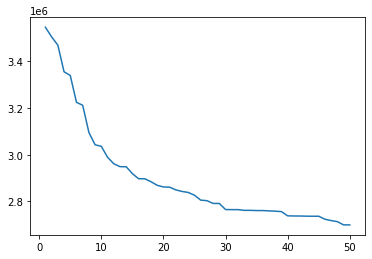

In [253]:
X_plot = [i for i in range(1, X.shape[1])]
Y_plot = []
for i in X_plot:
    pca_i = PCA(n_components=i)
    pca_i.fit(X, y)
    pca_i_X = pca_i.transform(X)
    reg_i = LinearRegression().fit(pca_i_X, y)
    Y_plot.append(np.mean((reg_i.predict(pca_i_X) - y)**2) ** 0.5)
plt.plot(X_plot, Y_plot)
    
# interact(plot, n_components=IntSlider(min=0, max=X.shape[1], continuous_update=False))

Fill out the cell below with your observations:

In [254]:
# Fill out this cell with observations #

### 2c. Canonical Correlation Analysis (CCA)

From the previous part, we saw that PCA is an unsupervised algorithm because it does not rely on feature labels, but rather focuses on the directions with the greatest variance in the feature matrix. However, there are some situations where the most relevant dimensions are not those with the greatest variance. For example, if the feature data was contaminated with a strong, correlated noise signal, PCA would actually throw away those dimensions with this strong noise variation, the opposite of our desired outcome. In this case, we prefer to approach dimensionality reduction in a way that takes advantage of paired, i.e labeled $(X, y)$ data. This is where CCA comes into play.

Fill out the cells below using CCA along with linear regression to find the MSE of 2, 5, and 8 components. How does CCA perform compared to PCA with the same number of components? How does increasing the number of componetns affect the MSE? In general, CCA performs closely to linear regression. Why is that?


In [278]:
# CCA with 2 components #
# YOUR CODE HERE #

# Solution #
cca2 = CCA(n_components=2)
cca2.fit(X, y)
cca2_X = cca2.transform(X)
reg2 = LinearRegression().fit(cca2_X, y)
mse2 = np.mean((reg2.predict(cca2_X) - y)**2) ** 0.5
mse2
# End solution #

/home/william/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:323: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2699272.5784772914

In [279]:
# CCA with 5 components #
# YOUR CODE HERE #

# Solution #
cca5 = CCA(n_components=5)
cca5.fit(X, y)
cca5_X = cca5.transform(X)
reg5 = LinearRegression().fit(cca5_X, y)
mse5 = np.mean((reg5.predict(cca5_X) - y)**2) ** 0.5
mse5
# End solution #

/home/william/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:323: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2699272.5784772914

In [280]:
# CCA with 8 components #
# YOUR CODE HERE #

# Solution #
cca8 = CCA(n_components=8)
cca8.fit(X, y)
cca8_X = cca5.transform(X)
reg8 = LinearRegression().fit(cca8_X, y)
mse8 = np.mean((reg8.predict(cca8_X) - y)**2) ** 0.5
mse8
# End solution #

/home/william/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:323: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2699272.5784772914

Fill out the cell below with your observations:

In [86]:
# Fill out this cell with observations #

## Part 3: Noisy Data

In the previous part, we saw observations from Linear Regression, PCA, and CCA on a dataset that has not been affected by noise. We will now observe what happens when our salary column has noise added to it, and how the accuracy of our predictions are affected by it.

First, run the cell below to generate noised predictions. The <code>utils.noised_predictions</code> is a black box function that will randomly add noise to our salary column using a random Gaussian.

In [146]:
y_noise = utils.noised_predictions(cleaned)
y_noise

0      8.998205e+06
2      2.106635e+06
4      4.744029e+05
5      1.370400e+06
6      4.806524e+05
           ...     
621    6.782441e+06
622    5.301801e+05
624    1.623634e+07
625    1.199633e+07
626    4.651153e+06
Name: salary, Length: 421, dtype: float64

### 3a. Noisy PCA

Use `sklearn_PCA` with your noisy predictions and 2, 5, and 8 of the features from the original dataset. How does adding noise to the salary column change the MSE?

In [288]:
# PCA with 2 components #
# YOUR CODE HERE #

# Solution #
sklearn_PCA(X, y_noise, 2)
# End solution #

3503556.872572767

In [289]:
# PCA with 5 components #
# YOUR CODE HERE #

# Solution #
sklearn_PCA(X, y_noise, 5)
# End solution #

3338913.37512543

In [290]:
# PCA with 8 components #
# YOUR CODE HERE #

# Solution #
sklearn_PCA(X, y_noise, 8)
# End solution #

3094444.62629387

Fill out the cell below with your observations:

In [91]:
# Fill out this cell with observations #

### 3b. Noisy CCA

Use PCA with your noisy predictions and your original dataset. How does adding noise to the salary column change the MSE?

In [291]:
# CCA with 2 components #
# YOUR CODE HERE #

# Solution #
cca_noise2 = CCA(n_components=2)
cca_noise2.fit(X, y_noise)
cca_noise2_X = cca_noise2.transform(X)
reg_noise2 = LinearRegression().fit(cca_noise2_X, y_noise)
mse_noise2 = np.mean((reg_noise2.predict(cca_noise2_X) - y_noise)**2) ** 0.5
mse_noise2
# End solution #

/home/william/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:323: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2699452.881145035

In [292]:
# CCA with 5 components #
# YOUR CODE HERE #

# Solution #
cca_noise5 = CCA(n_components=2)
cca_noise5.fit(X, y_noise)
cca_noise5_X = cca_noise5.transform(X)
reg_noise5 = LinearRegression().fit(cca_noise5_X, y_noise)
mse_noise5 = np.mean((reg_noise5.predict(cca_noise5_X) - y_noise)**2) ** 0.5
mse_noise5
# End solution #

/home/william/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:323: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2699452.881145035

In [293]:
# CCA with 8 components #
# YOUR CODE HERE #

# Solution #
cca_noise8 = CCA(n_components=2)
cca_noise8.fit(X, y_noise)
cca_noise8_X = cca_noise8.transform(X)
reg_noise8 = LinearRegression().fit(cca_noise8_X, y_noise)
mse_noise8 = np.mean((reg_noise2.predict(cca_noise8_X) - y_noise)**2) ** 0.5
mse_noise8
# End solution #

/home/william/anaconda3/envs/personal/lib/python3.8/site-packages/sklearn/cross_decomposition/_pls.py:323: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2699452.881145035

Fill out the cell below with your observations:

In [95]:
# Fill out this cell with observations #

## Part 4: Dirty Data
In industry contexts, you will often rely on remote data that has been collected in some black box form. This section will work through the process of uncovering this data and cleaning it. The following call creates a `hw.db` file in the same directory as this notebook. 

In [345]:
utils.make_db('baseball_data.csv')

### 4a. Cleaning the dirty data

We now have a SQLite DB we can access. Connect to this database and create a pandas DataFrame from the table within it.

In [420]:
import sqlite3
#SOLUTION
dirty_data = pd.read_sql("SELECT * FROM df", con=sqlite3.connect('hw.db'))

Let's explore this data:

In [421]:
dirty_data.head()

,index,SO,hr,'crbi',dp,ch,sf,hbp,yearid,'cs',...,CR,x2b,BB,GS,RBI,'sh',g.x,lgid,namelast,'x3b'
0,55,44.0,3.0,77.0,None,210.0,3.0,3,2012.0,1.0,...,118,7.0,15.0,48.0,19.0,NaN,90.0,AL,Bourjos,0.0
1,134,169.0,33.0,222.0,37,392.0,3.0,7,2012.0,3.0,...,206,20.0,37.0,77.0,85.0,0.0,79.0,AL,None,0.0
2,481,109.0,11.0,85.0,36,128.0,0.0,3,NaN,1.0,...,90,14.0,30.0,65.0,42.0,3.0,90.0,None,nan,0.0
3,195,NaN,NaN,195.0,0,498.0,2.0,0,2012.0,1.0,...,None,1.0,8.0,11.0,4.0,0.0,15.0,AL,Fukudome,0.0
4,434,52.0,5.0,34.0,None,71.0,1.0,None,NaN,0.0,...,26,10.0,13.0,NaN,20.0,NaN,NaN,None,Parmelee,2.0


As you can see, this data has several issues: there are nan values, duplicate rows, column name changes, and data format changes. Let's clean this data!

First, let's standardize the column labels. (Hint: how can we create a predictable format invariant to the headers' current form?)

In [422]:
#Solution
dirty_data = dirty_data.rename(lambda col: col.strip('\''), axis='columns').rename(lambda col: col.upper(), axis='columns')
dirty_data.head()

,INDEX,SO,HR,CRBI,DP,CH,SF,HBP,YEARID,CS,...,CR,X2B,BB,GS,RBI,SH,G.X,LGID,NAMELAST,X3B
0,55,44.0,3.0,77.0,None,210.0,3.0,3,2012.0,1.0,...,118,7.0,15.0,48.0,19.0,NaN,90.0,AL,Bourjos,0.0
1,134,169.0,33.0,222.0,37,392.0,3.0,7,2012.0,3.0,...,206,20.0,37.0,77.0,85.0,0.0,79.0,AL,None,0.0
2,481,109.0,11.0,85.0,36,128.0,0.0,3,NaN,1.0,...,90,14.0,30.0,65.0,42.0,3.0,90.0,None,nan,0.0
3,195,NaN,NaN,195.0,0,498.0,2.0,0,2012.0,1.0,...,None,1.0,8.0,11.0,4.0,0.0,15.0,AL,Fukudome,0.0
4,434,52.0,5.0,34.0,None,71.0,1.0,None,NaN,0.0,...,26,10.0,13.0,NaN,20.0,NaN,NaN,None,Parmelee,2.0


Next, drop duplicates. (Hint: some columns have no Nan values).

In [423]:
#Solution
dirty_data = dirty_data.drop_duplicates(subset=['ID'])
dirty_data.head()

,INDEX,SO,HR,CRBI,DP,CH,SF,HBP,YEARID,CS,...,CR,X2B,BB,GS,RBI,SH,G.X,LGID,NAMELAST,X3B
0,55,44.0,3.0,77.0,None,210.0,3.0,3,2012.0,1.0,...,118,7.0,15.0,48.0,19.0,NaN,90.0,AL,Bourjos,0.0
1,134,169.0,33.0,222.0,37,392.0,3.0,7,2012.0,3.0,...,206,20.0,37.0,77.0,85.0,0.0,79.0,AL,None,0.0
2,481,109.0,11.0,85.0,36,128.0,0.0,3,NaN,1.0,...,90,14.0,30.0,65.0,42.0,3.0,90.0,None,nan,0.0
3,195,NaN,NaN,195.0,0,498.0,2.0,0,2012.0,1.0,...,None,1.0,8.0,11.0,4.0,0.0,15.0,AL,Fukudome,0.0
4,434,52.0,5.0,34.0,None,71.0,1.0,None,NaN,0.0,...,26,10.0,13.0,NaN,20.0,NaN,NaN,None,Parmelee,2.0


Replace NaN values with their column mean. This requires setting columns with string values back to integers.

In [424]:
#Solution
for col in dirty_data:
        try:
            dirty_data[col] = dirty_data[col].astype(float)
        except:
            pass
dirty_data = dirty_data.fillna(np.nan)

dirty_data = dirty_data.fillna(dirty_data.mean())
dirty_data

,INDEX,SO,HR,CRBI,DP,CH,SF,HBP,YEARID,CS,...,CR,X2B,BB,GS,RBI,SH,G.X,LGID,NAMELAST,X3B
0,55.0,44.00000,3.000000,77.0,17.886288,210.0,3.0,3.000000,2012.0,1.0,...,118.000000,7.0,15.0,48.000000,19.0,1.368687,90.000000,AL,Bourjos,0.0
1,134.0,169.00000,33.000000,222.0,37.000000,392.0,3.0,7.000000,2012.0,3.0,...,206.000000,20.0,37.0,77.000000,85.0,0.000000,79.000000,AL,NaN,0.0
2,481.0,109.00000,11.000000,85.0,36.000000,128.0,0.0,3.000000,2012.0,1.0,...,90.000000,14.0,30.0,65.000000,42.0,3.000000,90.000000,NaN,nan,0.0
3,195.0,54.12116,7.867572,195.0,0.000000,498.0,2.0,0.000000,2012.0,1.0,...,242.431779,1.0,8.0,11.000000,4.0,0.000000,15.000000,AL,Fukudome,0.0
4,434.0,52.00000,5.000000,34.0,17.886288,71.0,1.0,2.388982,2012.0,0.0,...,26.000000,10.0,13.0,63.244932,20.0,1.368687,72.123311,NaN,Parmelee,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,145.0,5.00000,0.000000,0.0,4.000000,4.0,0.0,1.000000,2012.0,0.0,...,4.000000,0.0,1.0,4.000000,0.0,0.000000,5.000000,NaN,nan,0.0
1770,197.0,57.00000,5.000000,585.0,68.000000,1811.0,4.0,1.000000,2012.0,4.0,...,1059.000000,18.0,44.0,116.000000,49.0,5.000000,120.000000,NL,Furcal,3.0
1844,368.0,68.00000,8.000000,166.0,5.000000,279.0,1.0,0.000000,2012.0,0.0,...,157.000000,13.0,9.0,59.000000,27.0,6.000000,66.000000,AL,Mathis,0.0
1867,342.0,46.00000,3.000000,28.0,29.000000,111.0,1.0,6.000000,2012.0,3.0,...,43.000000,16.0,19.0,83.000000,27.0,6.000000,106.000000,NL,Lombardozzi,3.0


To prepare our data, one-hot-encode categorical variables.

In [425]:
ohe_dirty_data = dirty_data.copy()
for col in ('POS', 'TEAMID', 'LGID'):
    ohe_dirty_data = ohe_dirty_data.merge(
    pd.get_dummies(dirty_data[col]),
     how='inner', right_index=True, left_index = True
    ).T.drop_duplicates().T.rename(lambda c: str(c).rsplit('_x', 1)[0], axis='columns').drop(col, axis=1)



We don't need player names/ID, so remove those features (they aren't useful categorical features). Additionally, drop the 'INDEX' column because it is a residual from importing SQL data. Because `G_BATTING` is all nan, r

In [432]:
#SOLUTION
ohe_dirty_data = ohe_dirty_data.drop(['INDEX', 'ID', 'NAMEFIRST', 'NAMELAST', 'G_BATTING'], axis=1).astype(float)

In [450]:
ohe_dirty_data.isna().sum()[ohe_dirty_data.isna().sum().astype(bool)]

G_BATTING    628
dtype: int64

With our data clean, let's split our data into our features and prediction column.

In [436]:
X_dirty = ohe_dirty_data.drop(columns=['SALARY'])
y_dirty = ohe_dirty_data['SALARY']

### 4b. Dirty PCA

Now run PCA on your dirty dataset, using 2, 5, and 8 components and find the MSE for your predictions. How does the performance compare to PCA of the original cleaned dataset?

In [437]:
# PCA with 2 components #
# YOUR CODE HERE #

# Solution #
pca_dirty2 = PCA(n_components=2)
pca_dirty2.fit(X_dirty, y_dirty)
pca_dirty2_X = pca_dirty2.transform(X_dirty)
reg_dirty2 = LinearRegression().fit(pca_dirty2_X, y_dirty)
mse_dirty2 = np.mean((reg_dirty2.predict(pca_dirty2_X) - y_dirty)**2) ** 0.5
mse_dirty2
# End solution #

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [101]:
# PCA with 5 components #
# YOUR CODE HERE #

# Solution #
pca_dirty5 = PCA(n_components=2)
pca_dirty5.fit(X_dirty, y_dirty)
pca_dirty5_X = pca_dirty5.transform(X_dirty)
reg_dirty5 = LinearRegression().fit(pca_dirty5_X, y_dirty)
mse_dirty5 = np.mean((reg_dirty5.predict(pca_dirty5_X) - y_dirty)**2) ** 0.5
mse_dirty5
# End solution #

3651656.437507077

In [102]:
# PCA with 8 components #
# YOUR CODE HERE #

# Solution #
pca_dirty8 = PCA(n_components=2)
pca_dirty8.fit(X_dirty, y_dirty)
pca_dirty8_X = pca_dirty8.transform(X_dirty)
reg_dirty8 = LinearRegression().fit(pca_dirty8_X, y_dirty)
mse_dirty8 = np.mean((reg_dirty8.predict(pca_dirty8_X) - y_dirty)**2) ** 0.5
mse_dirty8
# End solution #

3651656.437507077

Fill out the cell below with your observations:

In [103]:
# Fill out this cell with observations #

### 4c. Dirty CCA

Now run CCA on your dirty dataset, using 2, 5, and 8 components and find the MSE for your predictions. How does the performance compare to CCA of the original cleaned dataset?

In [104]:
# CCA with 2 components #
# YOUR CODE HERE #

# Solution #
cca_dirty2 = CCA(n_components=2)
cca_dirty2.fit(X_dirty, y_dirty)
cca_dirty2_X = cca_dirty2.transform(X_dirty)
reg_dirty2 = LinearRegression().fit(cca_dirty2_X, y_dirty)
mse_dirty2 = np.mean((reg_dirty2.predict(cca_dirty2_X) - y_dirty)**2) ** 0.5
mse_dirty2
# End solution #

/Users/abhinavg/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2780163.520656927

In [105]:
# CCA with 5 components #
# YOUR CODE HERE #

# Solution #
cca_dirty5 = CCA(n_components=5)
cca_dirty5.fit(X_dirty, y_dirty)
cca_dirty5_X = cca_dirty5.transform(X_dirty)
reg_dirty5 = LinearRegression().fit(cca_dirty5_X, y_dirty)
mse_dirty5 = np.mean((reg_dirty5.predict(cca_dirty5_X) - y_dirty)**2) ** 0.5
mse_dirty5
# End solution #

/Users/abhinavg/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2780163.5206569275

In [106]:
# CCA with 8 components #
# YOUR CODE HERE #

# Solution #
cca_dirty8 = CCA(n_components=2)
cca_dirty8.fit(X_dirty, y_dirty)
cca_dirty8_X = cca_dirty8.transform(X_dirty)
reg_dirty8 = LinearRegression().fit(cca_dirty8_X, y_dirty)
mse_dirty8 = np.mean((reg_dirty8.predict(cca_dirty8_X) - y_dirty)**2) ** 0.5
mse_dirty8
# End solution #

/Users/abhinavg/opt/anaconda3/lib/python3.7/site-packages/sklearn/cross_decomposition/pls_.py:292: UserWarning: Y residual constant at iteration 1
  warnings.warn('Y residual constant at iteration %s' % k)


2780163.520656927

Fill out the cell below with your observations:

In [107]:
# Fill out this cell with observations #